In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import warnings
import pickle
from sklearn.model_selection import train_test_split

In [14]:
path = "diabetes_health_indicators.csv"
df = pd.read_csv(path)
df.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [15]:
df.shape

(253680, 22)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [17]:
df.describe()

Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



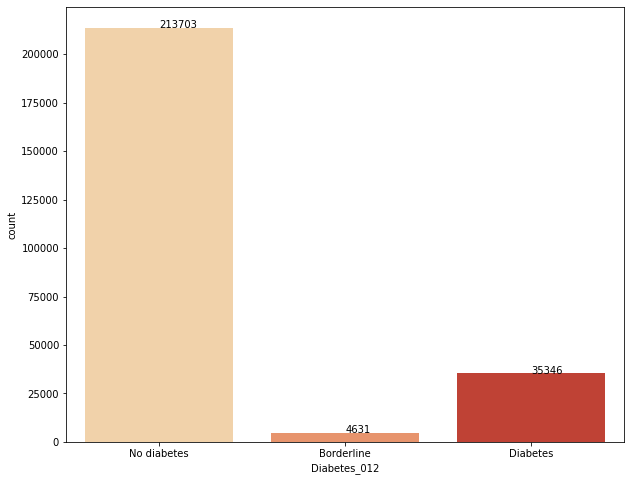

In [18]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df['Diabetes_012'], palette='OrRd')
ax.set_xticklabels(['No diabetes','Borderline','Diabetes'])
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.40, p.get_height()+1))

In [19]:
import plotly.express as px
import plotly.figure_factory as ff
fig = px.histogram(df, x="age")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'] but received: age

Most of the patients are from 50-70 age group

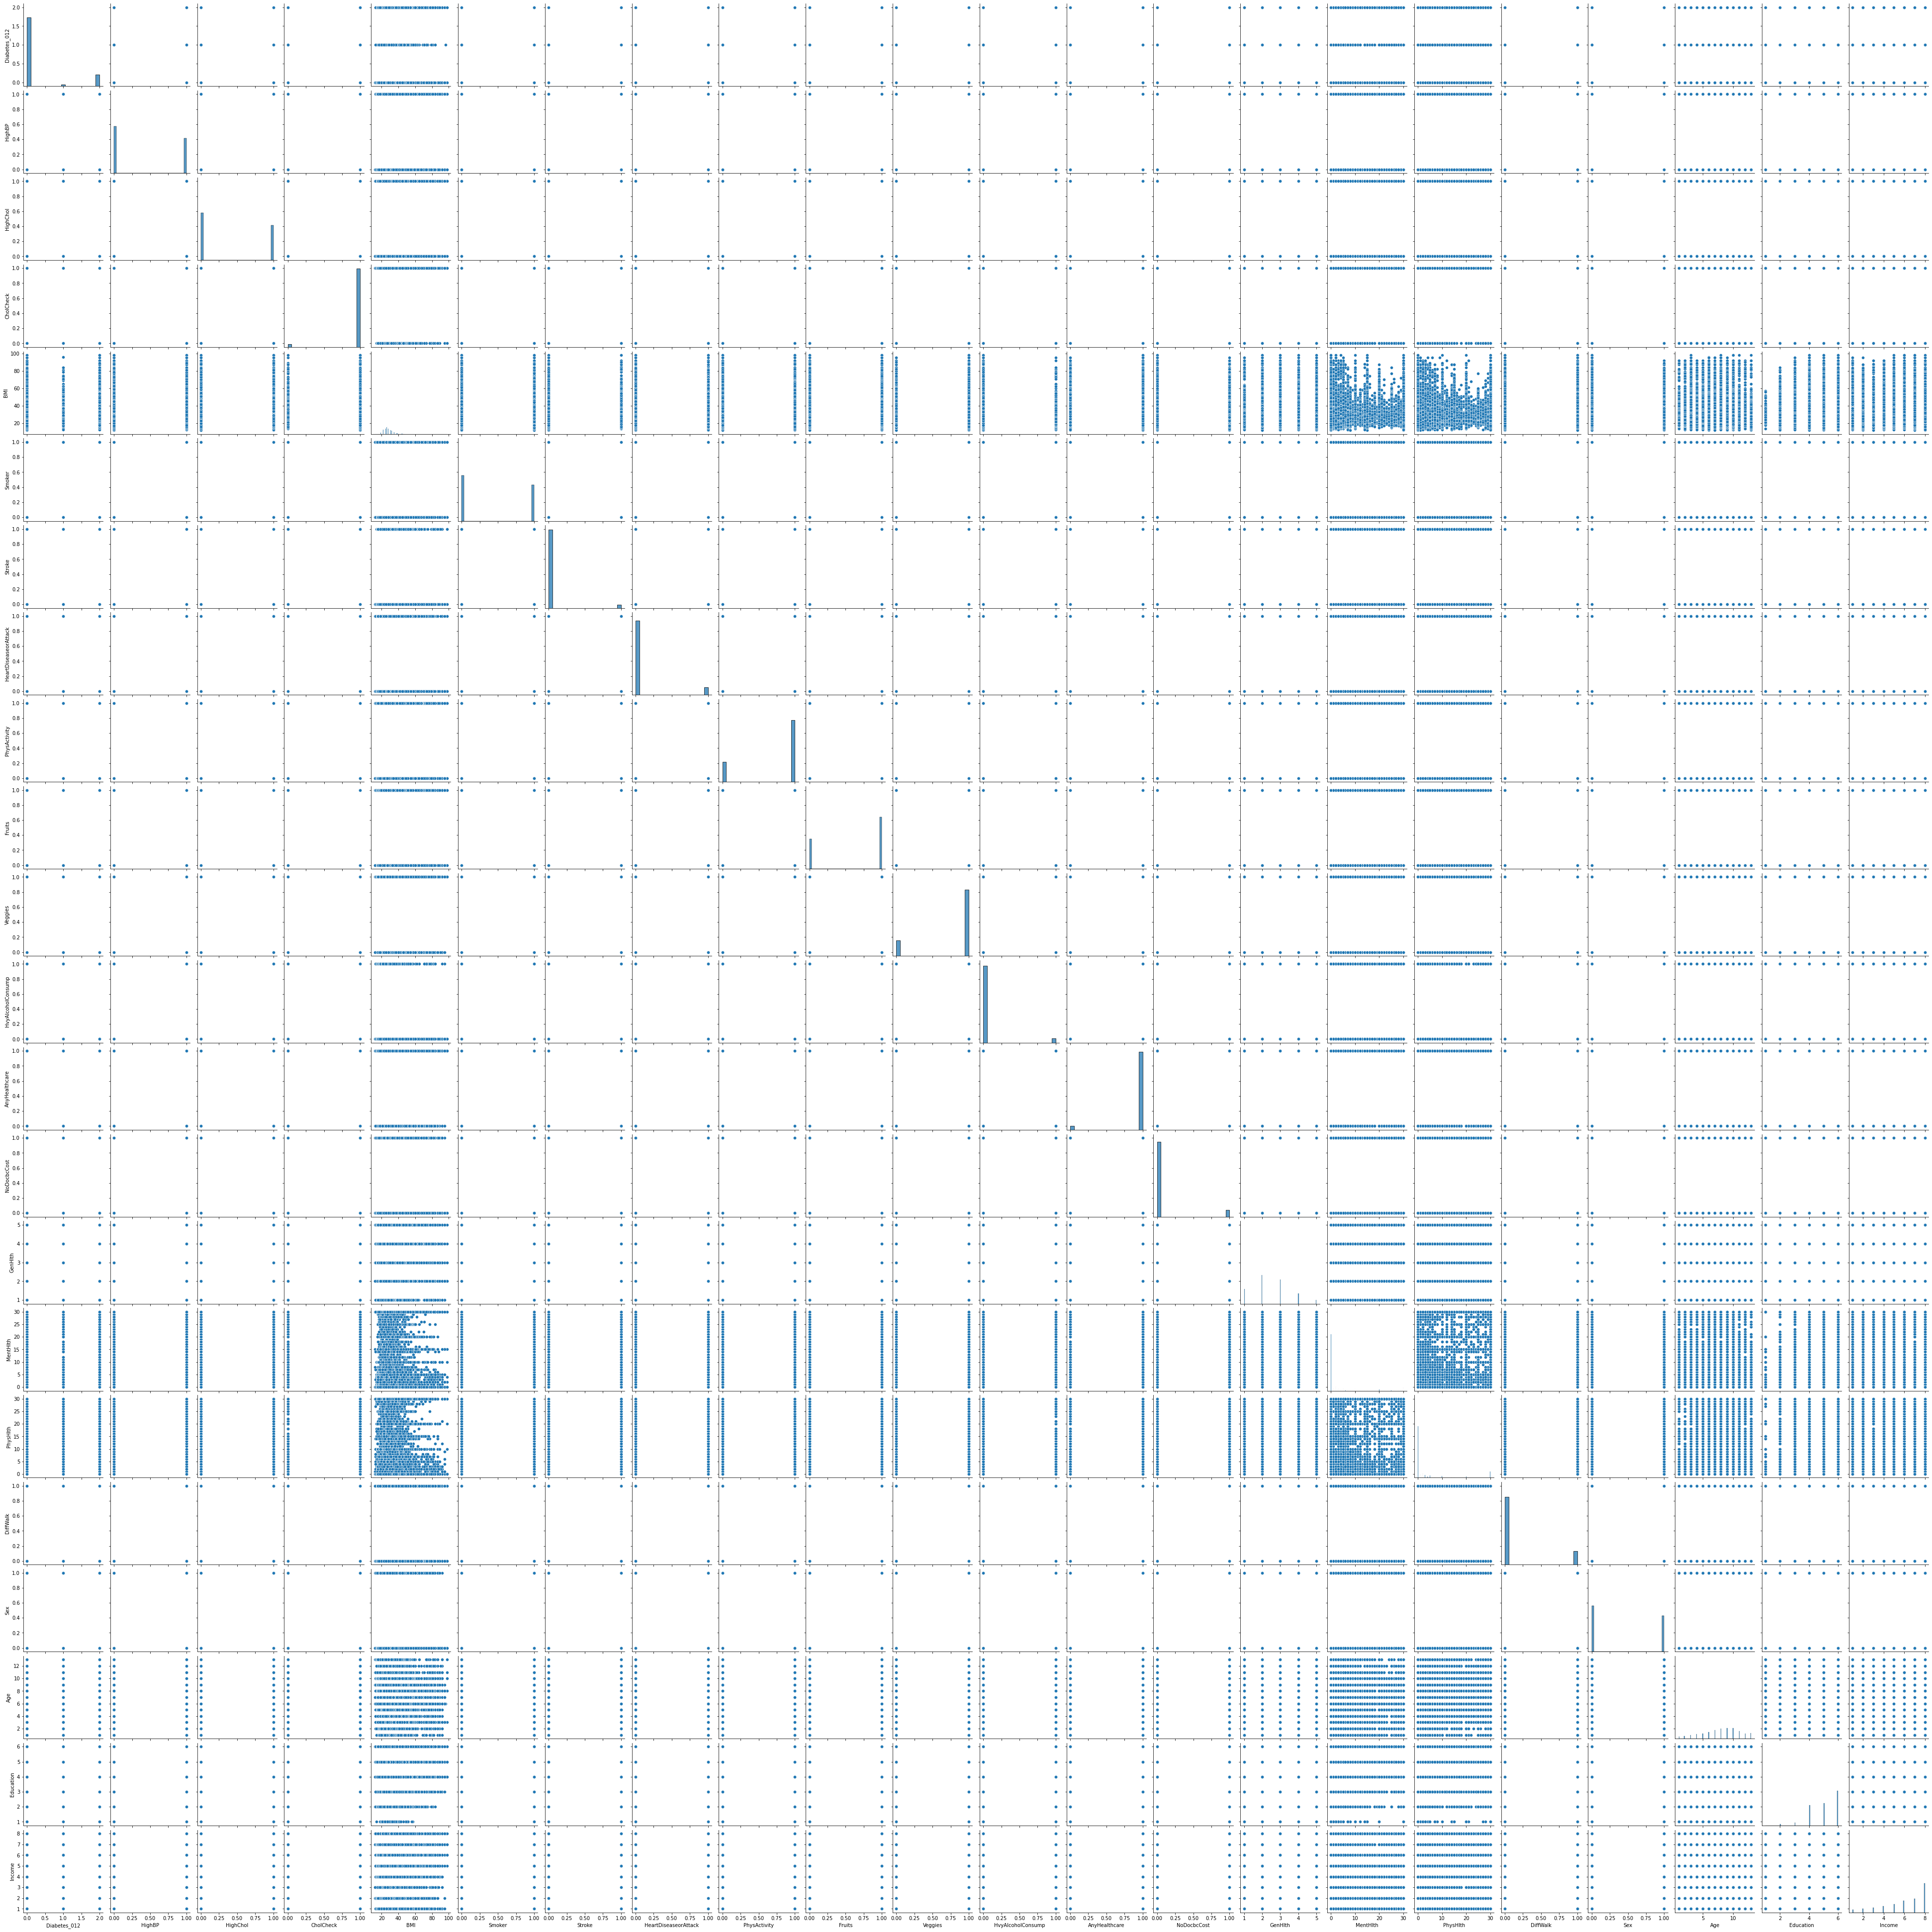

In [20]:
sns.pairplot(df)

Splitting dataframe to data and target

In [11]:
x = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y = df['DEATH_EVENT']

In [12]:
x.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  
0        0     4  
1        0     6  
2        1     7  
3        0     7  
4        0     8

In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [14]:
import math

In [15]:
def calc_entropy(column):
    """
    Calculate entropy given a pandas series, list, or numpy array.
    """
    # Compute the counts of each unique value in the column
    counts = np.bincount(column)
    # Divide by the total column length to get a probability
    probabilities = counts / len(column)
    
    # Initialize the entropy to 0
    entropy = 0
    # Loop through the probabilities, and add each one to the total entropy
    for prob in probabilities:
        if prob > 0:
            # use log from math and set base to 2
            entropy += prob * math.log(prob, 2)
    
    return -entropy

In [16]:
calc_entropy(df['time'])

6.906252849111906

In [17]:
def calc_information_gain(data, split_name, target_name):
    """
    Calculate information gain given a data set, column to split on, and target
    """
    # Calculate the original entropy
    original_entropy = calc_entropy(data[target_name])
    
    #Find the unique values in the column
    values = data[split_name].unique()
    
    
    # Make two subsets of the data, based on the unique values
    left_split = data[data[split_name] == values[0]]
    right_split = data[data[split_name] == values[1]]
    
    # Loop through the splits and calculate the subset entropies
    to_subtract = 0
    for subset in [left_split, right_split]:
        prob = (subset.shape[0] / data.shape[0]) 
        to_subtract += prob * calc_entropy(subset[target_name])
    
    # Return information gain
    return original_entropy - to_subtract

In [18]:
calc_information_gain(df, 'time', 'DEATH_EVENT')

0.9055415027672631

In [19]:
path = r"C:\Users\Nasim\Desktop\Graph-Database-Learning-Algorithms-Neo4j-\Dataset 1 - Heart Failure Prediction\Training Set.csv"
dfTrain = pd.read_csv(path)
dfTrain.head()
dfTrain.shape

(202, 13)

In [20]:
x_train = dfTrain[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y_train = dfTrain['DEATH_EVENT']

In [21]:
path = r"C:\Users\Nasim\Desktop\Graph-Database-Learning-Algorithms-Neo4j-\Dataset 1 - Heart Failure Prediction\Testing Set.csv"
dfTest = pd.read_csv(path)
dfTest.head()
dfTest.shape

(97, 13)

In [22]:
x_test = dfTest[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y_test = dfTest['DEATH_EVENT']

In [23]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((97, 12), (97,), (202, 12), (202,))

 Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.tree import plot_tree
from timeit import default_timer as timer
import time

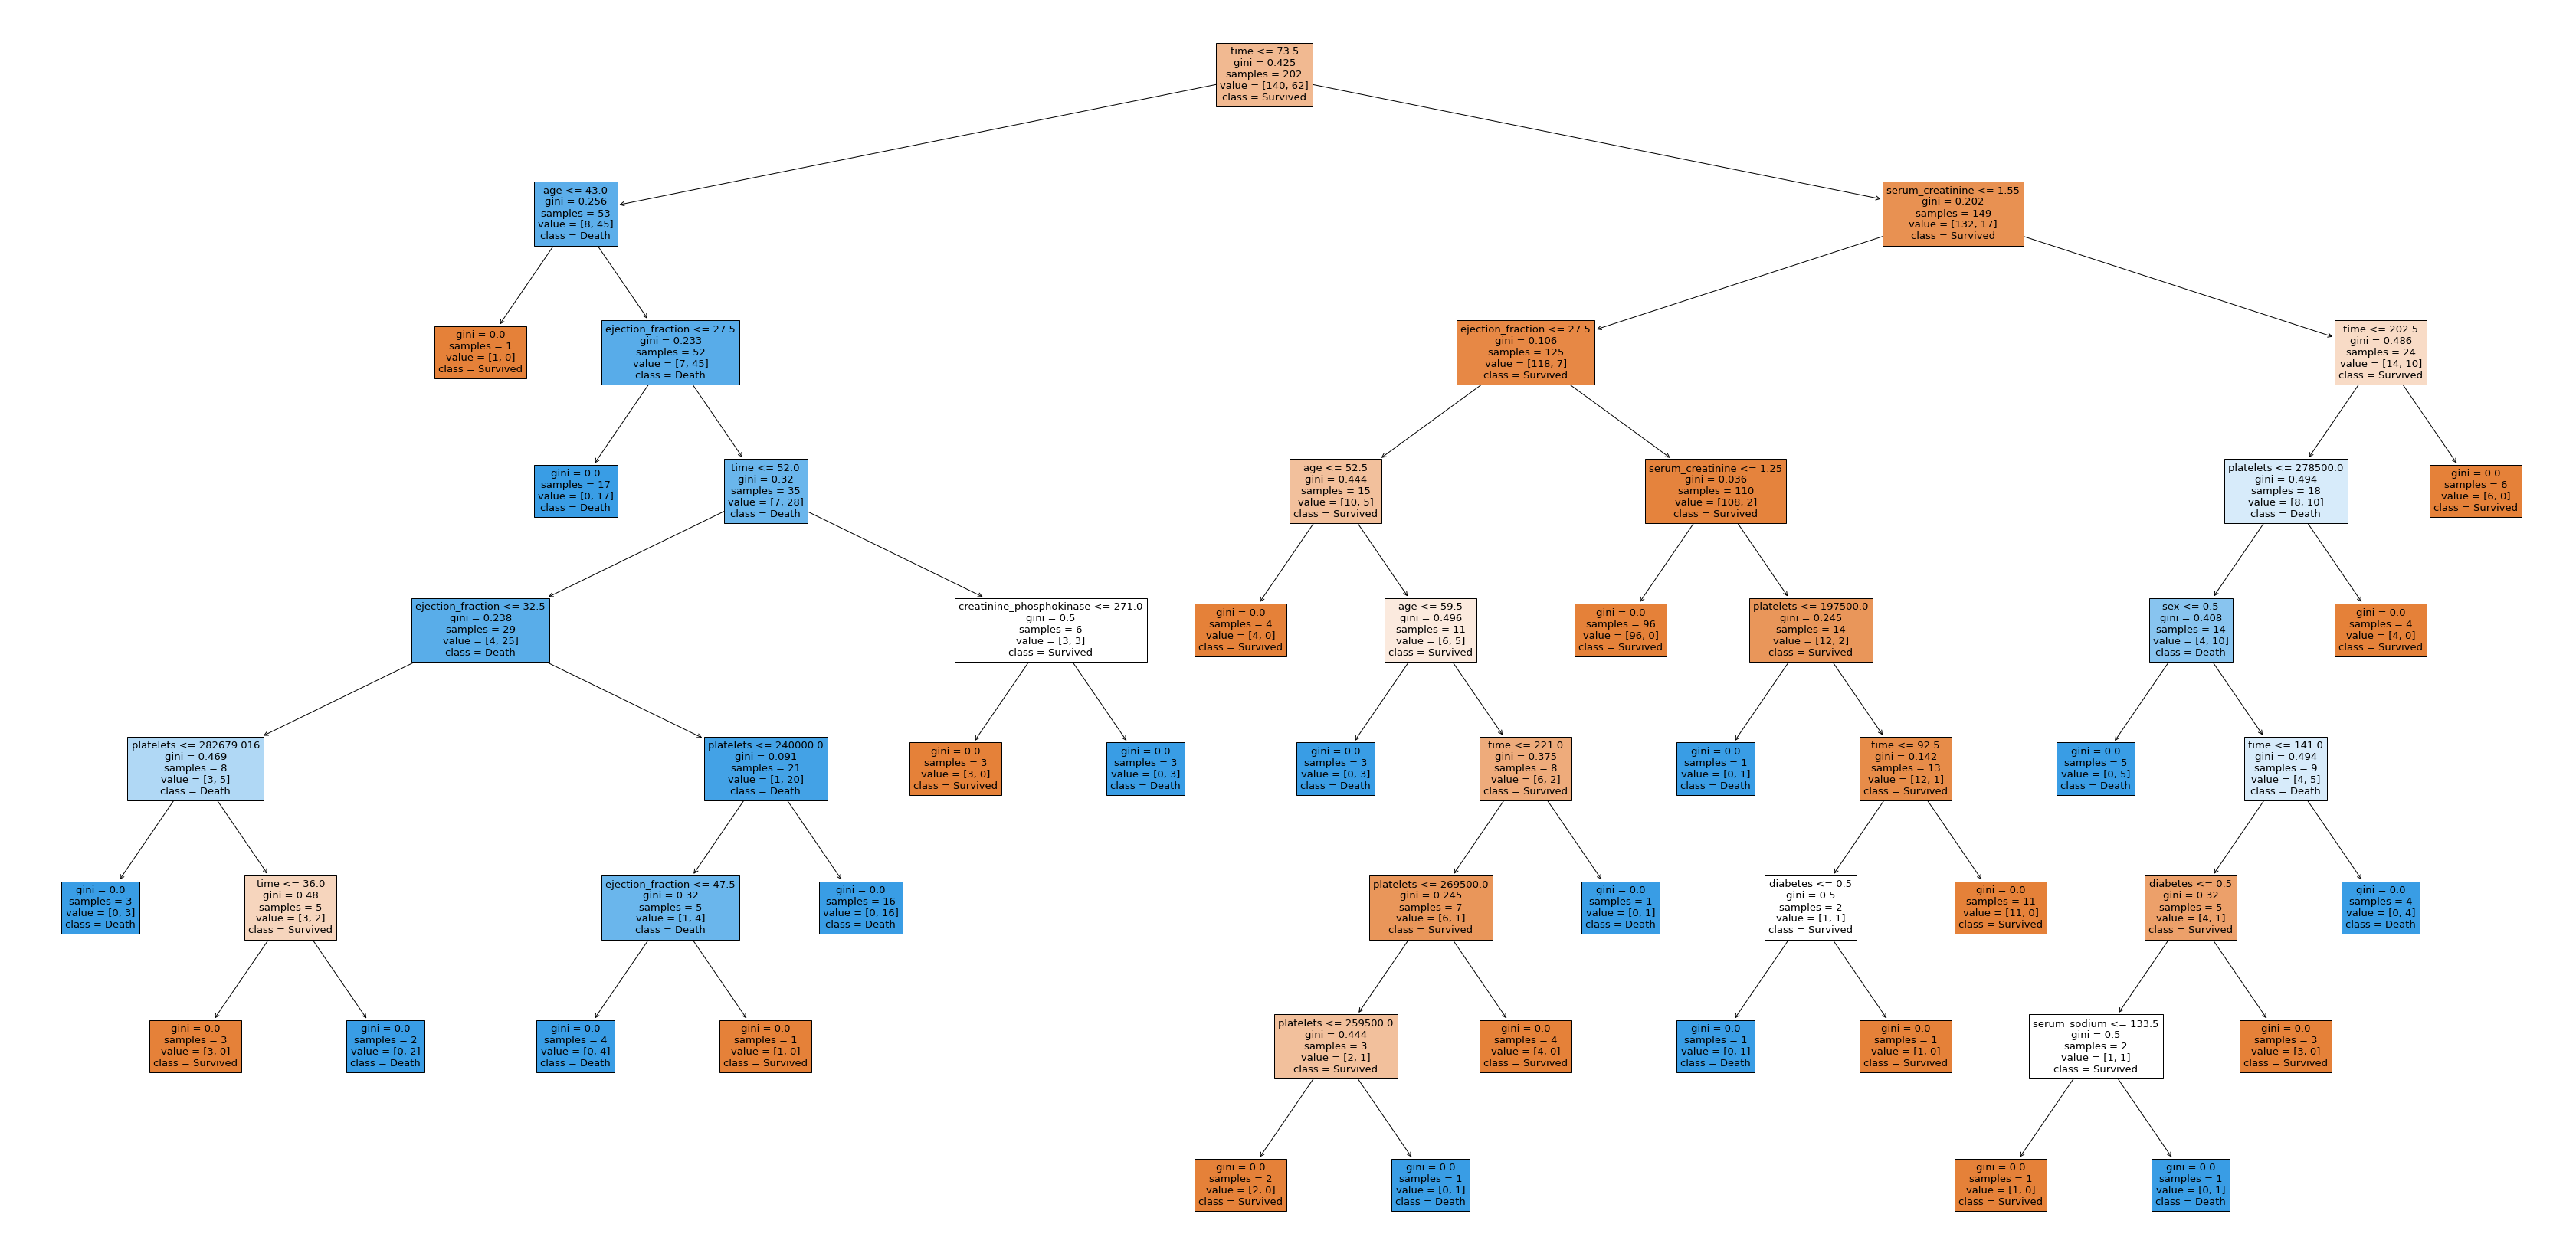

In [27]:
a = timer()
dt = DecisionTreeClassifier(criterion = "gini")
dt.fit(x_train, y_train)
b = timer()

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['Survived', "Death"],filled=True);

Evaluating model performance 

In [28]:
c = timer()
y_test_pred = dt.predict(x_test)
d = timer()

delta = b - a
delta1 = d - c

print("Time taken to generate tree: " + str(delta) + " second")
print("Time taken to predict: " + str(delta1) + " second")

Time taken to generate tree: 0.006841799999989462 second
Time taken to predict: 0.0020959999999945467 second


In [29]:
results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

TN  50
TP  15
FN  19
FP  13
[[50 13]
 [19 15]]


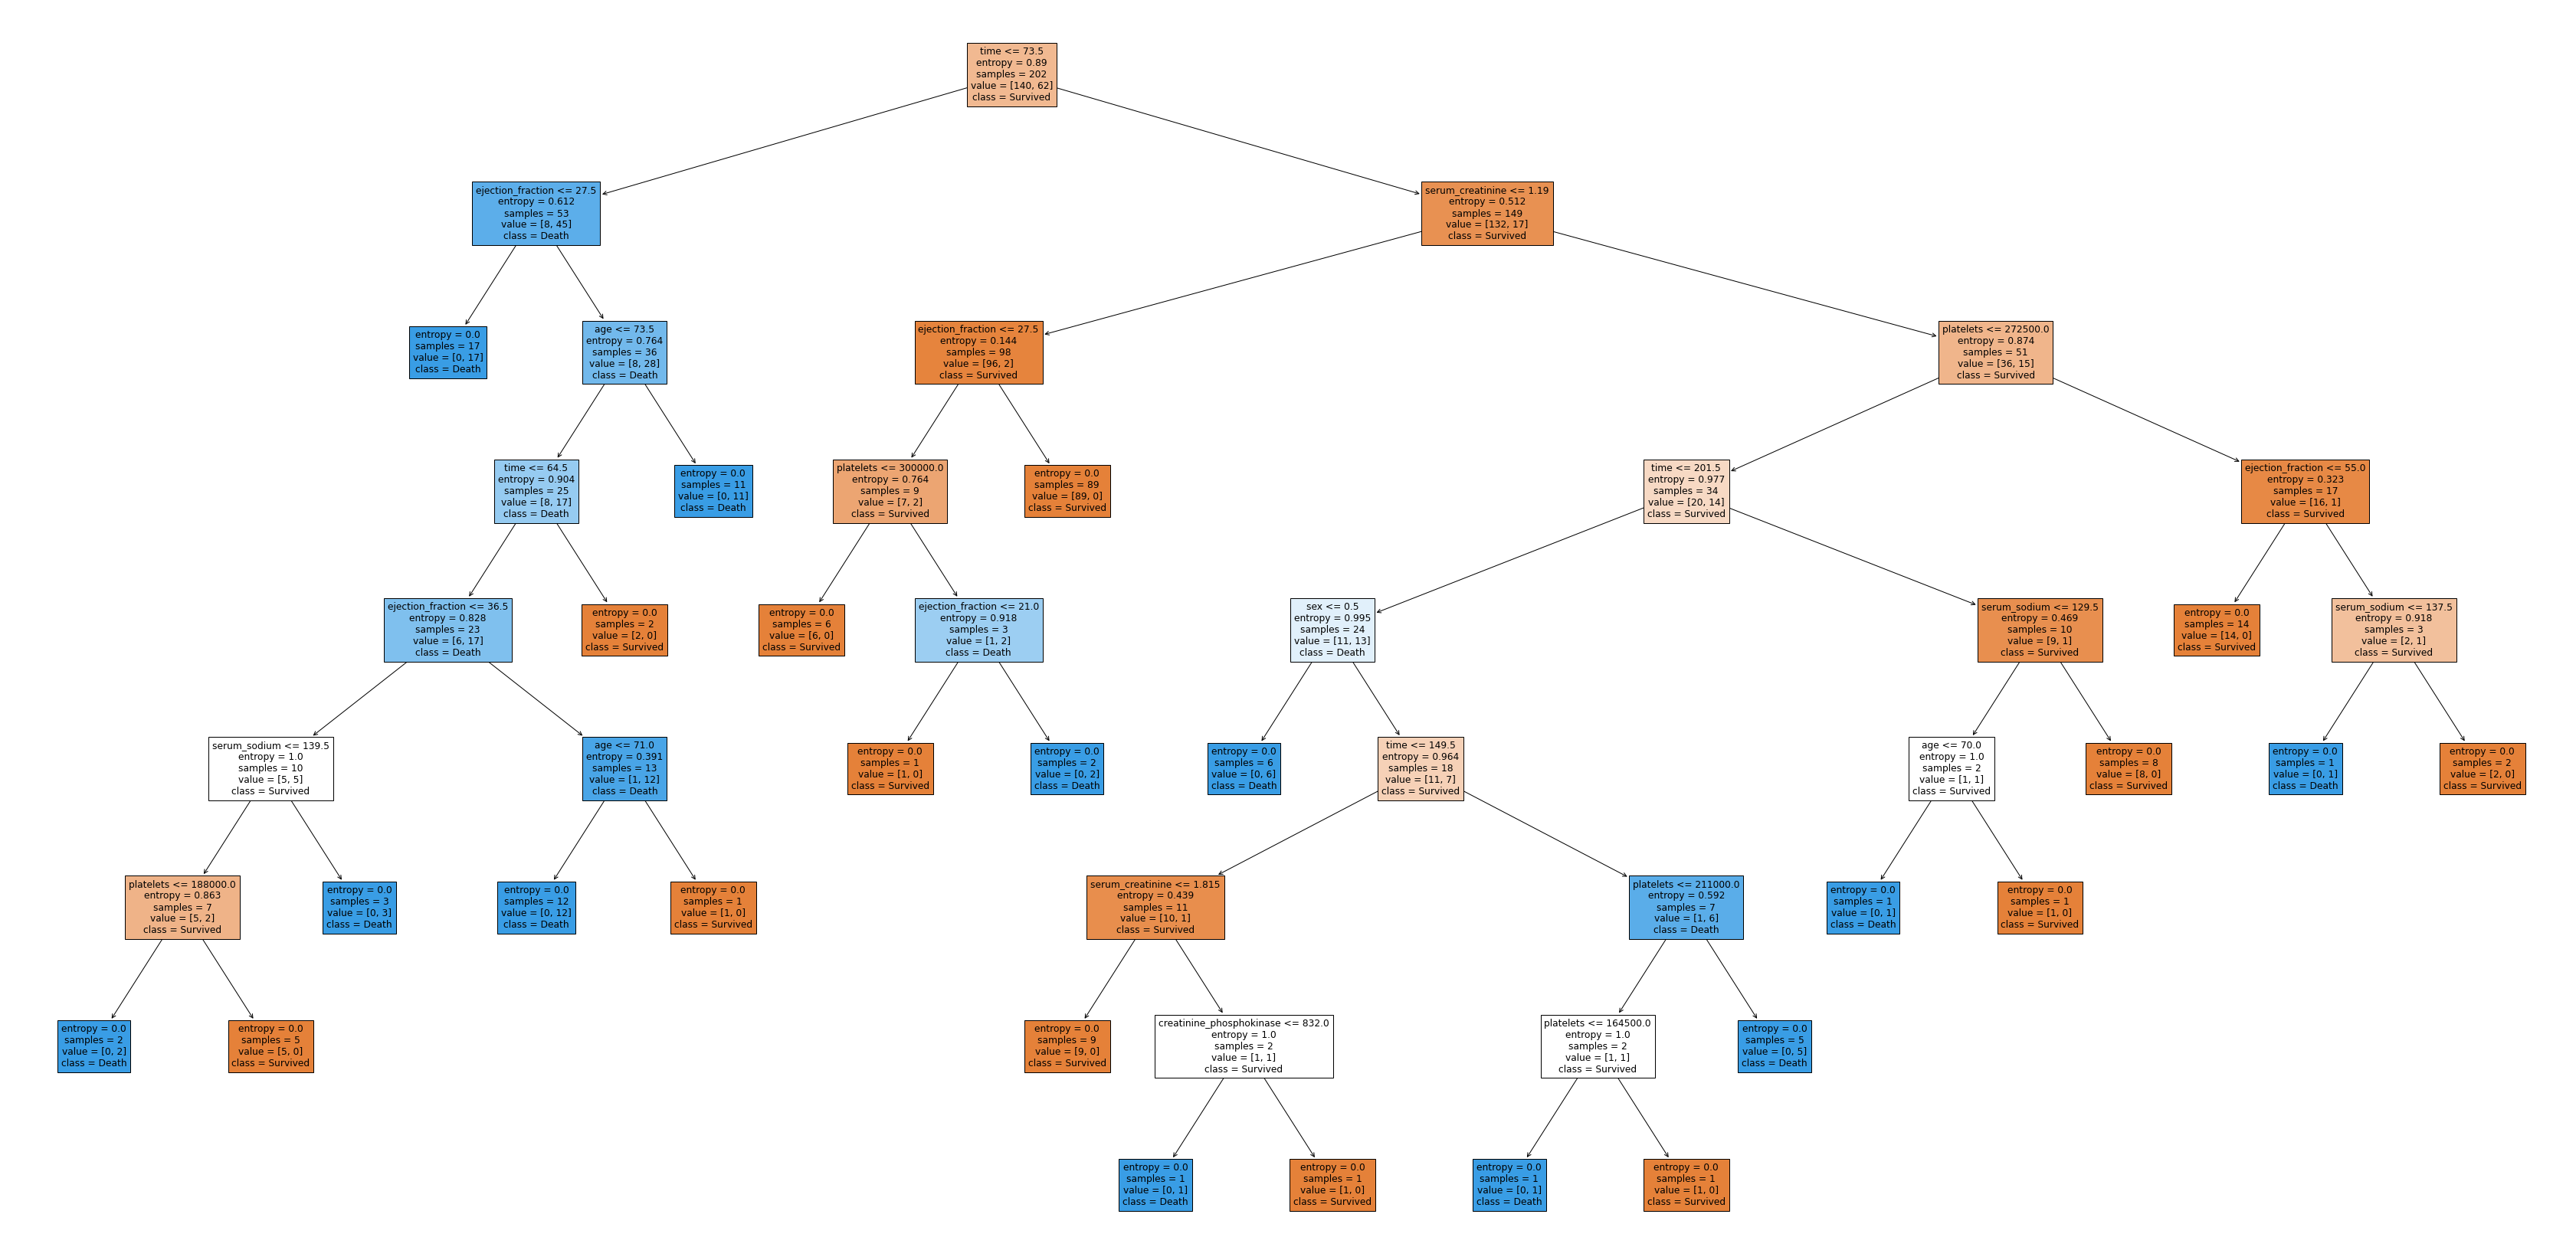

In [30]:
a = timer()
dt = DecisionTreeClassifier(criterion = "entropy")
dt.fit(x_train, y_train)
b = timer()

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['Survived', "Death"],filled=True);

In [31]:
c = timer()
y_test_pred = dt.predict(x_test)
d = timer()

delta = b - a
delta1 = d - c

print("Time taken to generate tree: " + str(delta) + " second")
print("Time taken to predict: " + str(delta1) + " second")

Time taken to generate tree: 0.00283430000001772 second
Time taken to predict: 0.001789499999972577 second


In [42]:
results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

TN  53
TP  19
FN  15
FP  10
[[53 10]
 [15 19]]


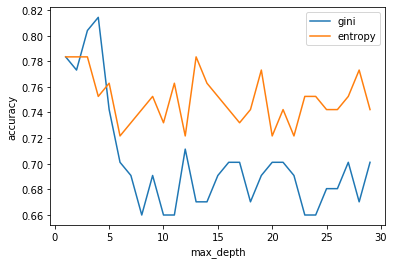

In [75]:
max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)

d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

array([[58,  5],
       [13, 21]], dtype=int64)

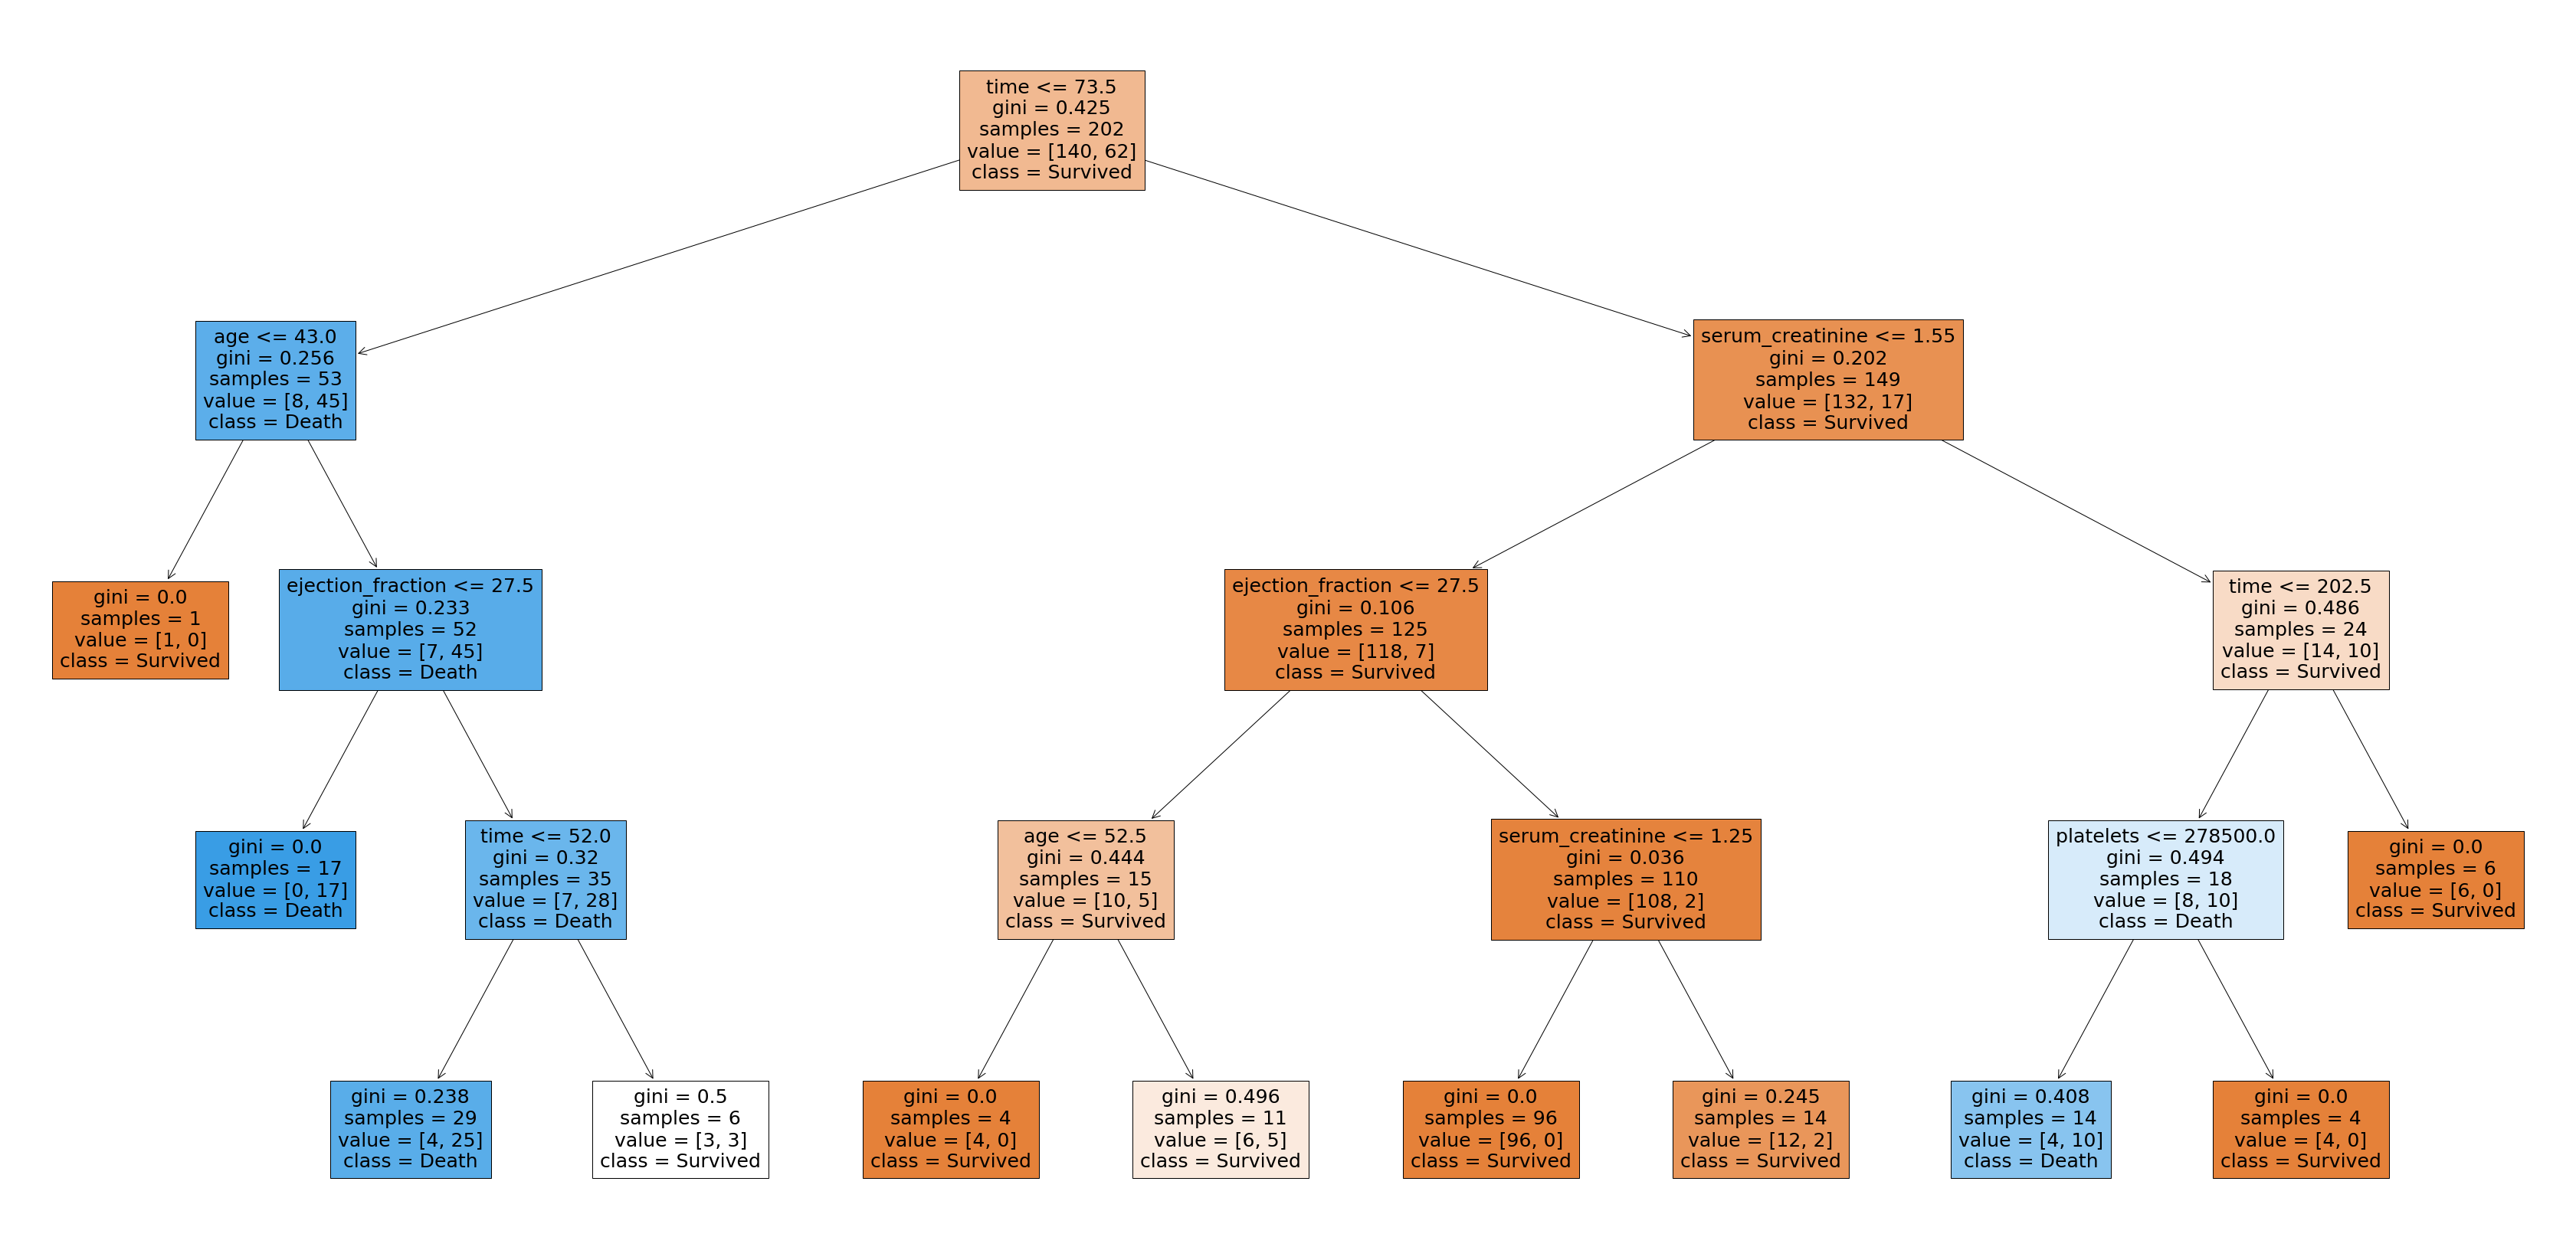

In [76]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['Survived', "Death"],filled=True);

y_test_pred = dt.predict(x_test)
cf = confusion_matrix(y_test, y_test_pred)
cf

array([[54,  9],
       [ 9, 25]], dtype=int64)

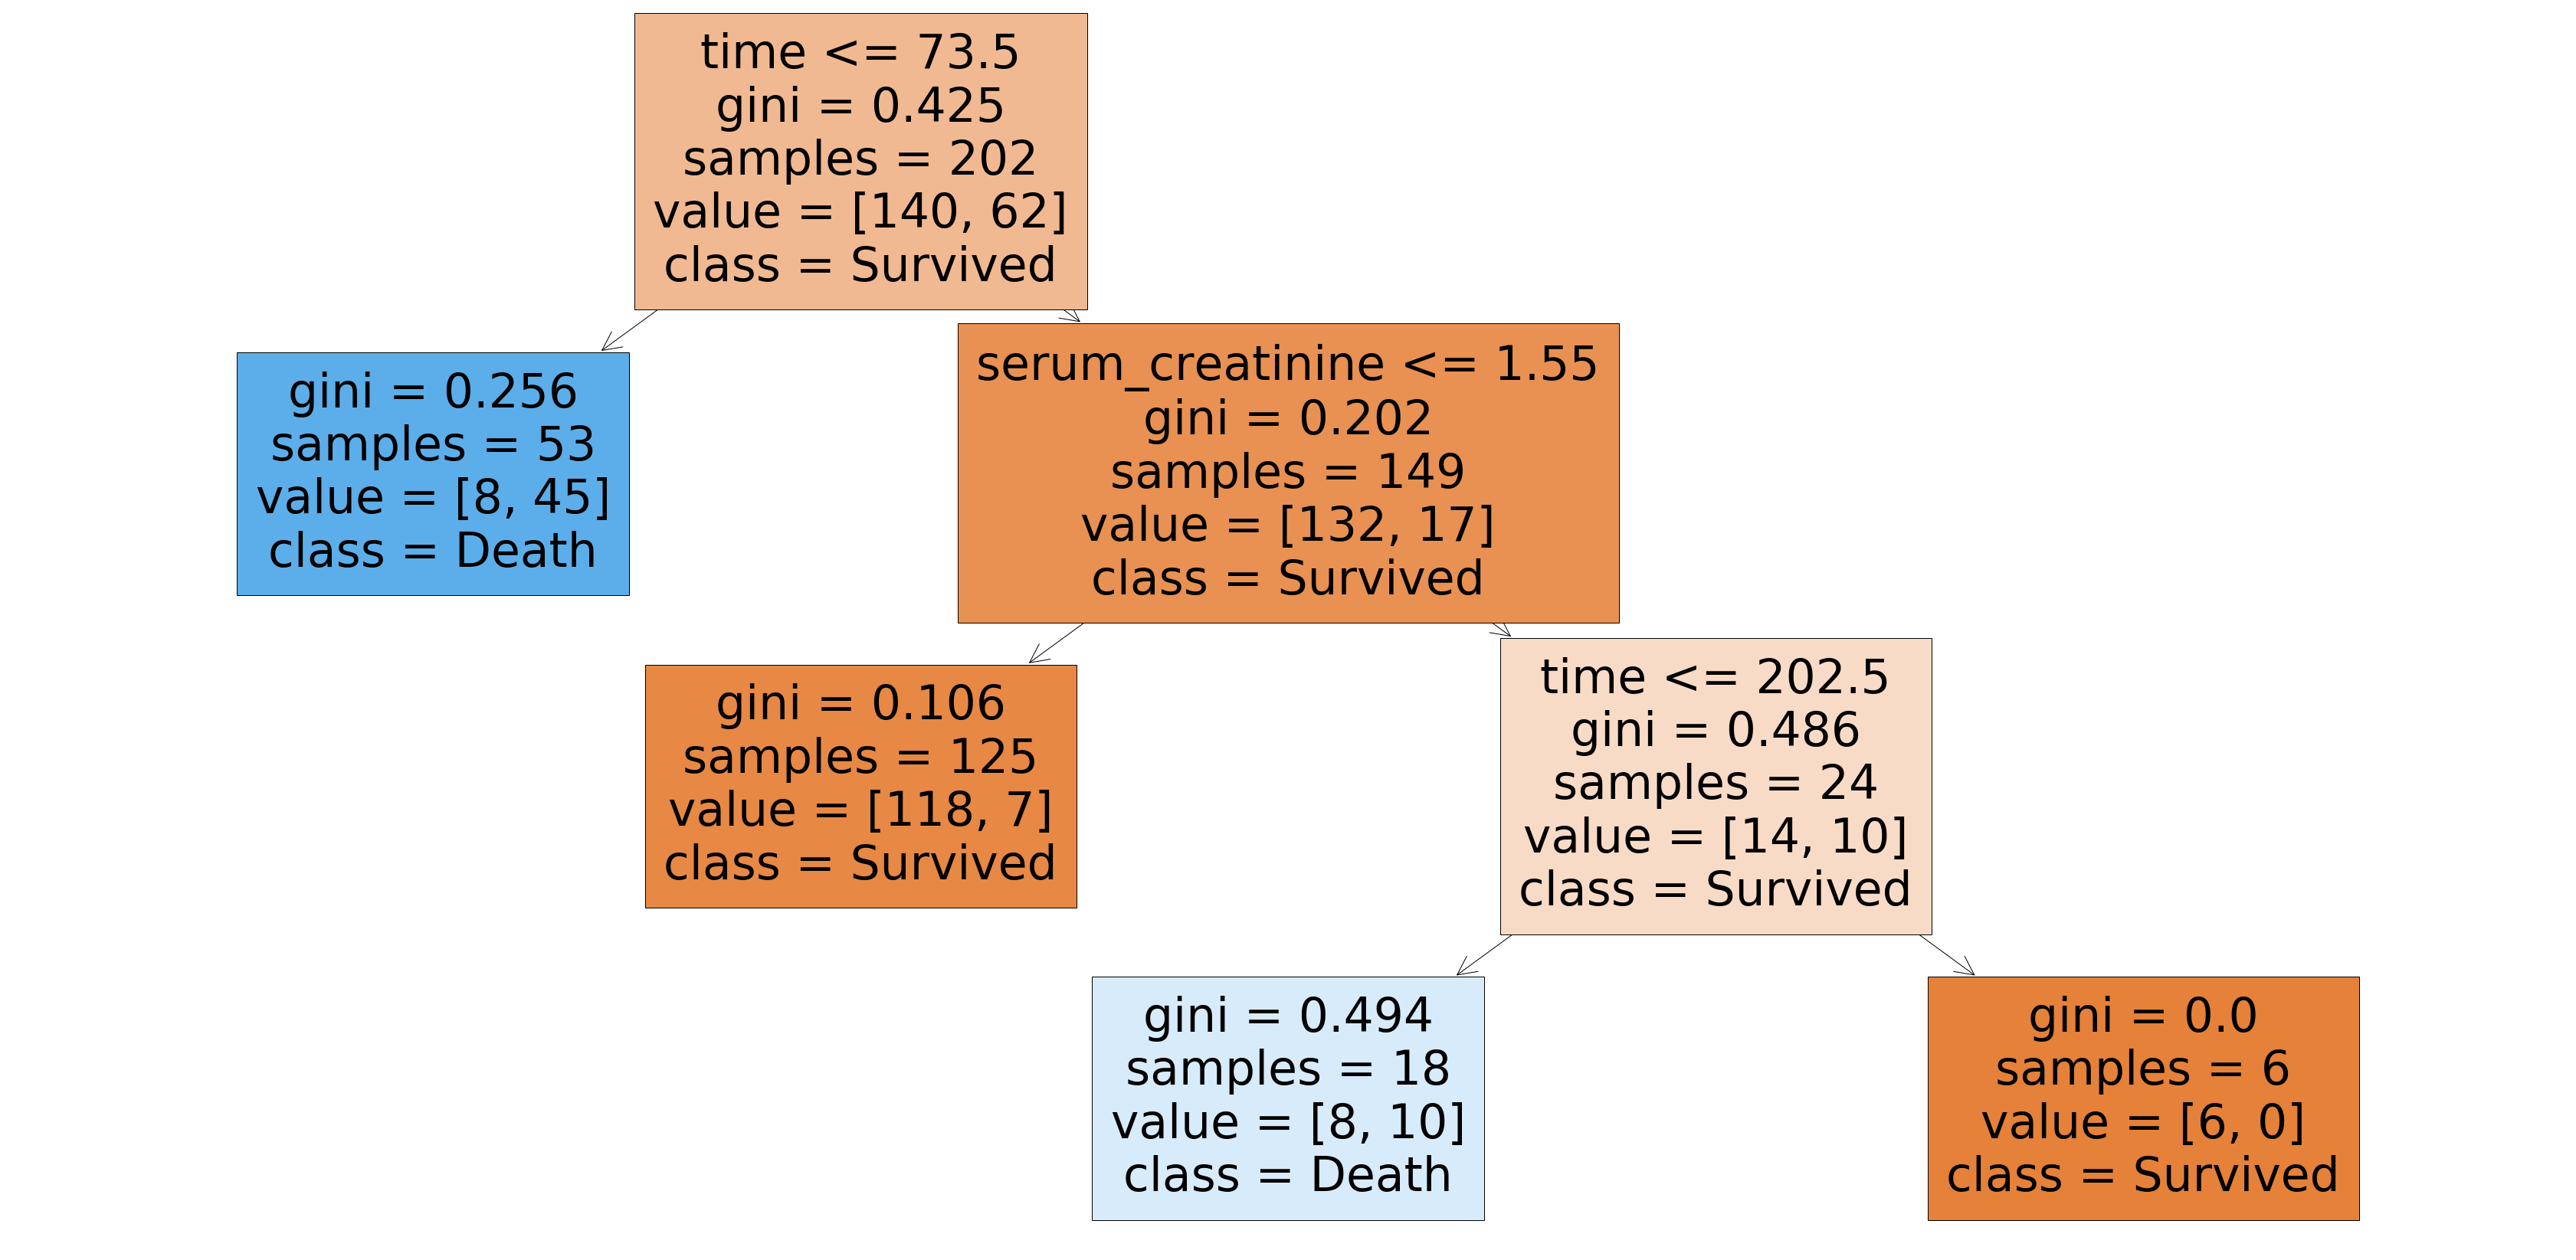

In [77]:
dt = DecisionTreeClassifier(max_leaf_nodes=4)
dt.fit(x_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['Survived', "Death"],filled=True);

y_test_pred = dt.predict(x_test)
cf = confusion_matrix(y_test, y_test_pred)
cf

array([[58,  5],
       [16, 18]], dtype=int64)

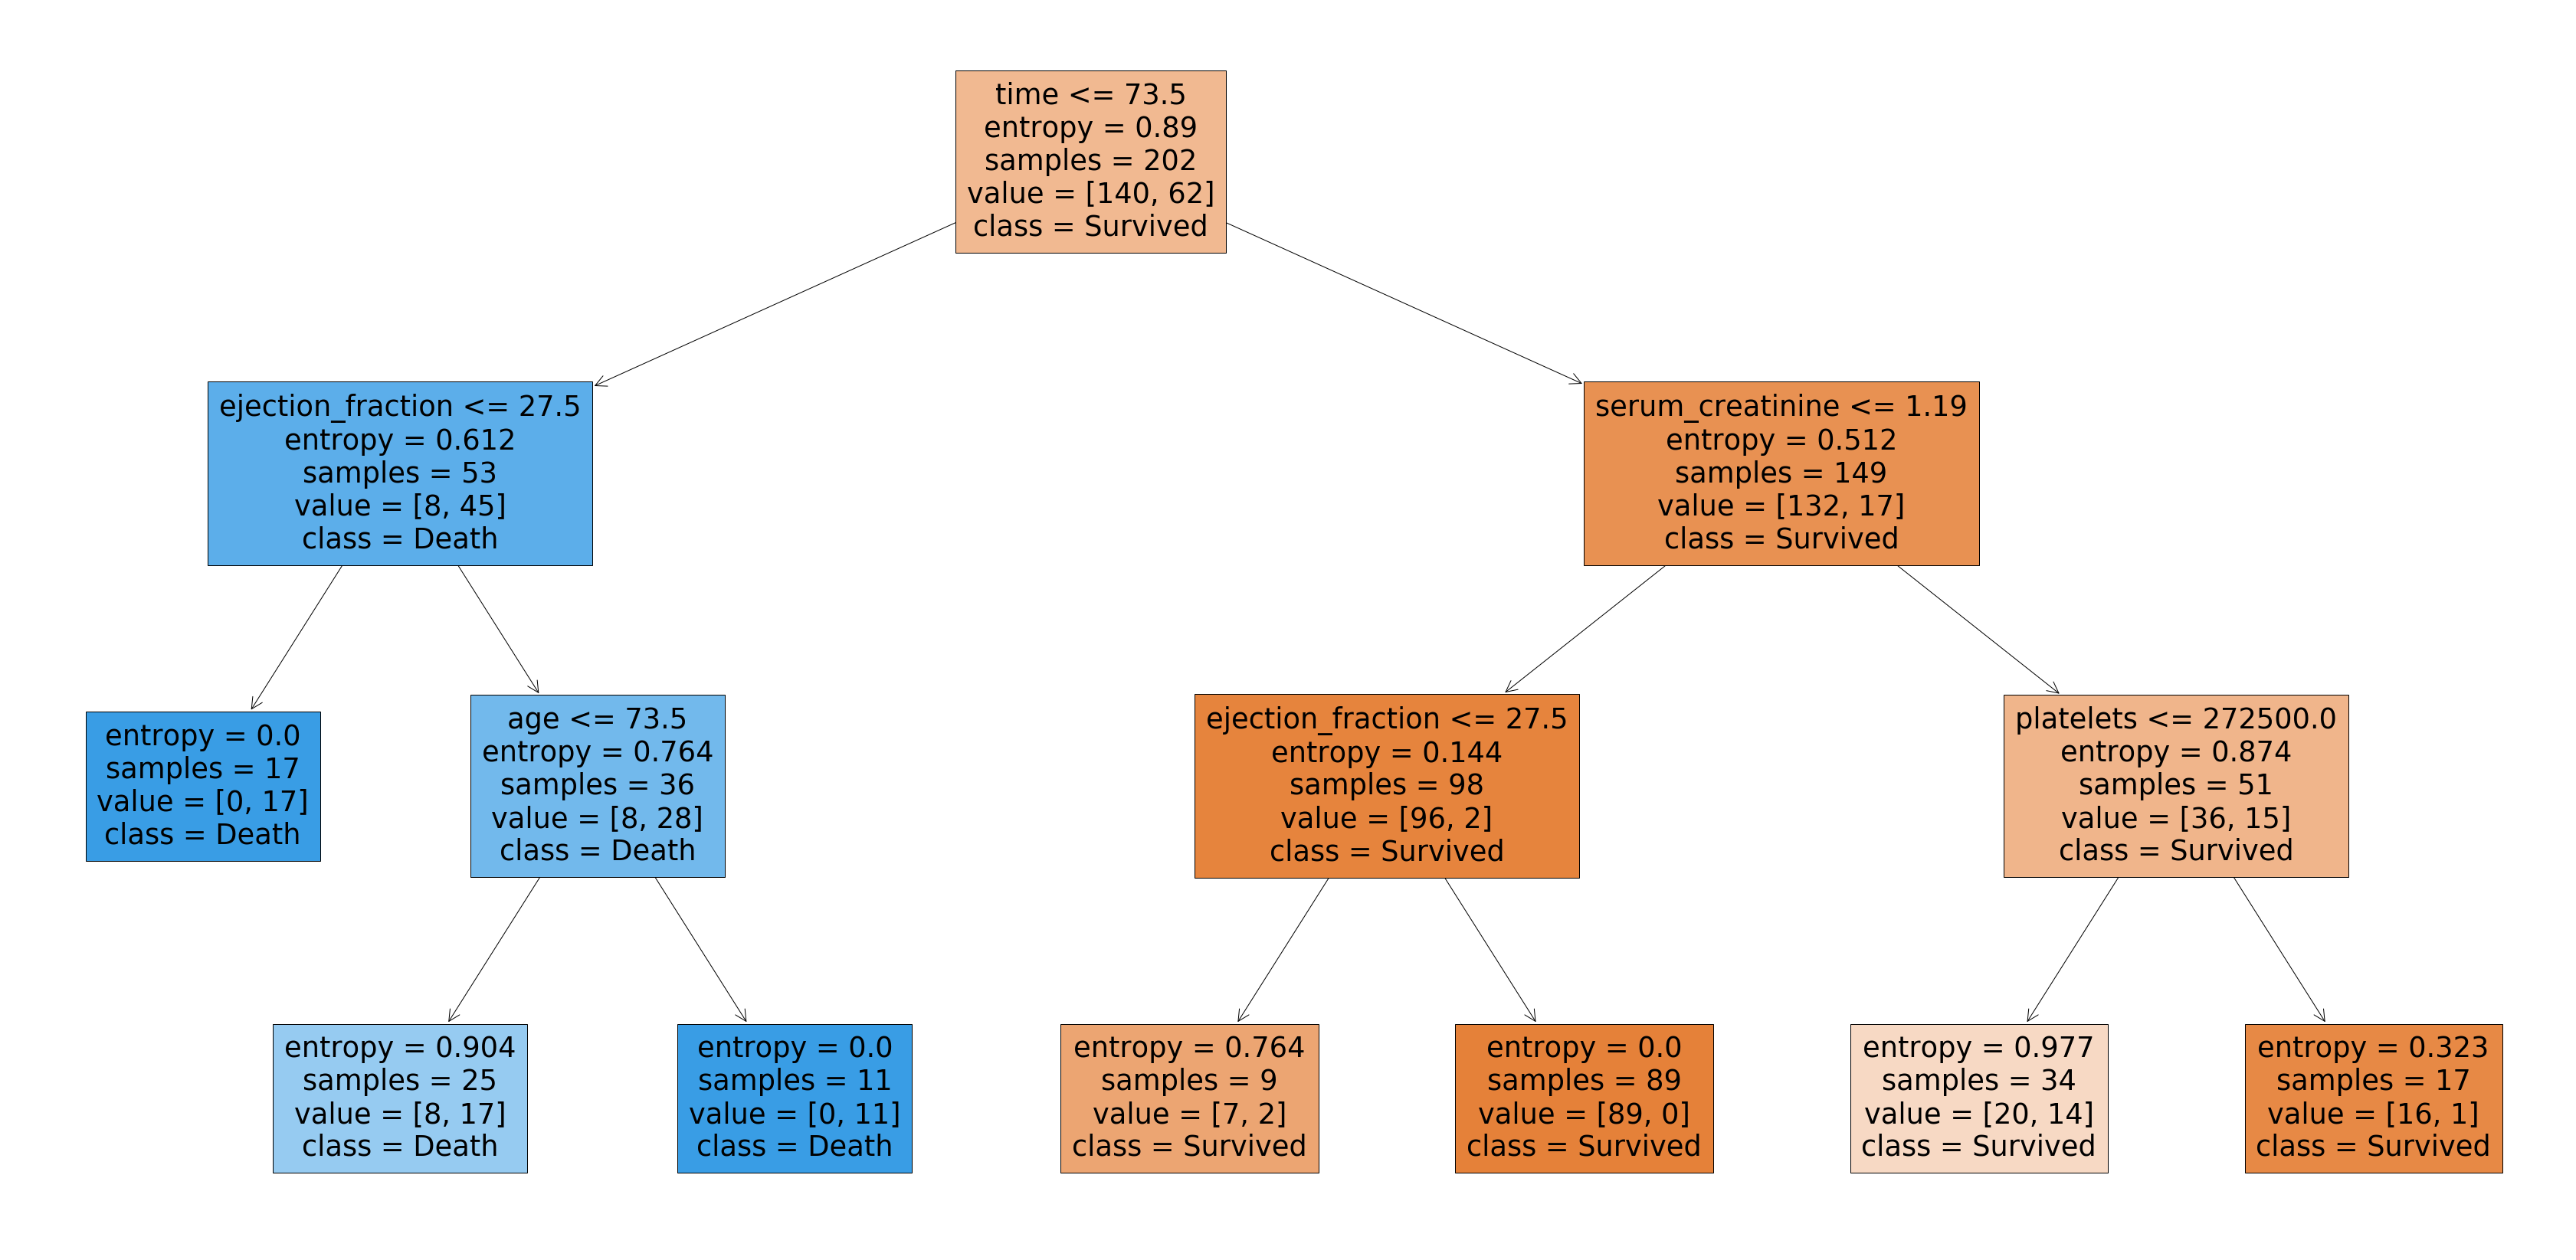

In [78]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
dt.fit(x_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['Survived', "Death"],filled=True);

y_test_pred = dt.predict(x_test)
cf = confusion_matrix(y_test, y_test_pred)
cf

array([[52, 11],
       [13, 21]], dtype=int64)

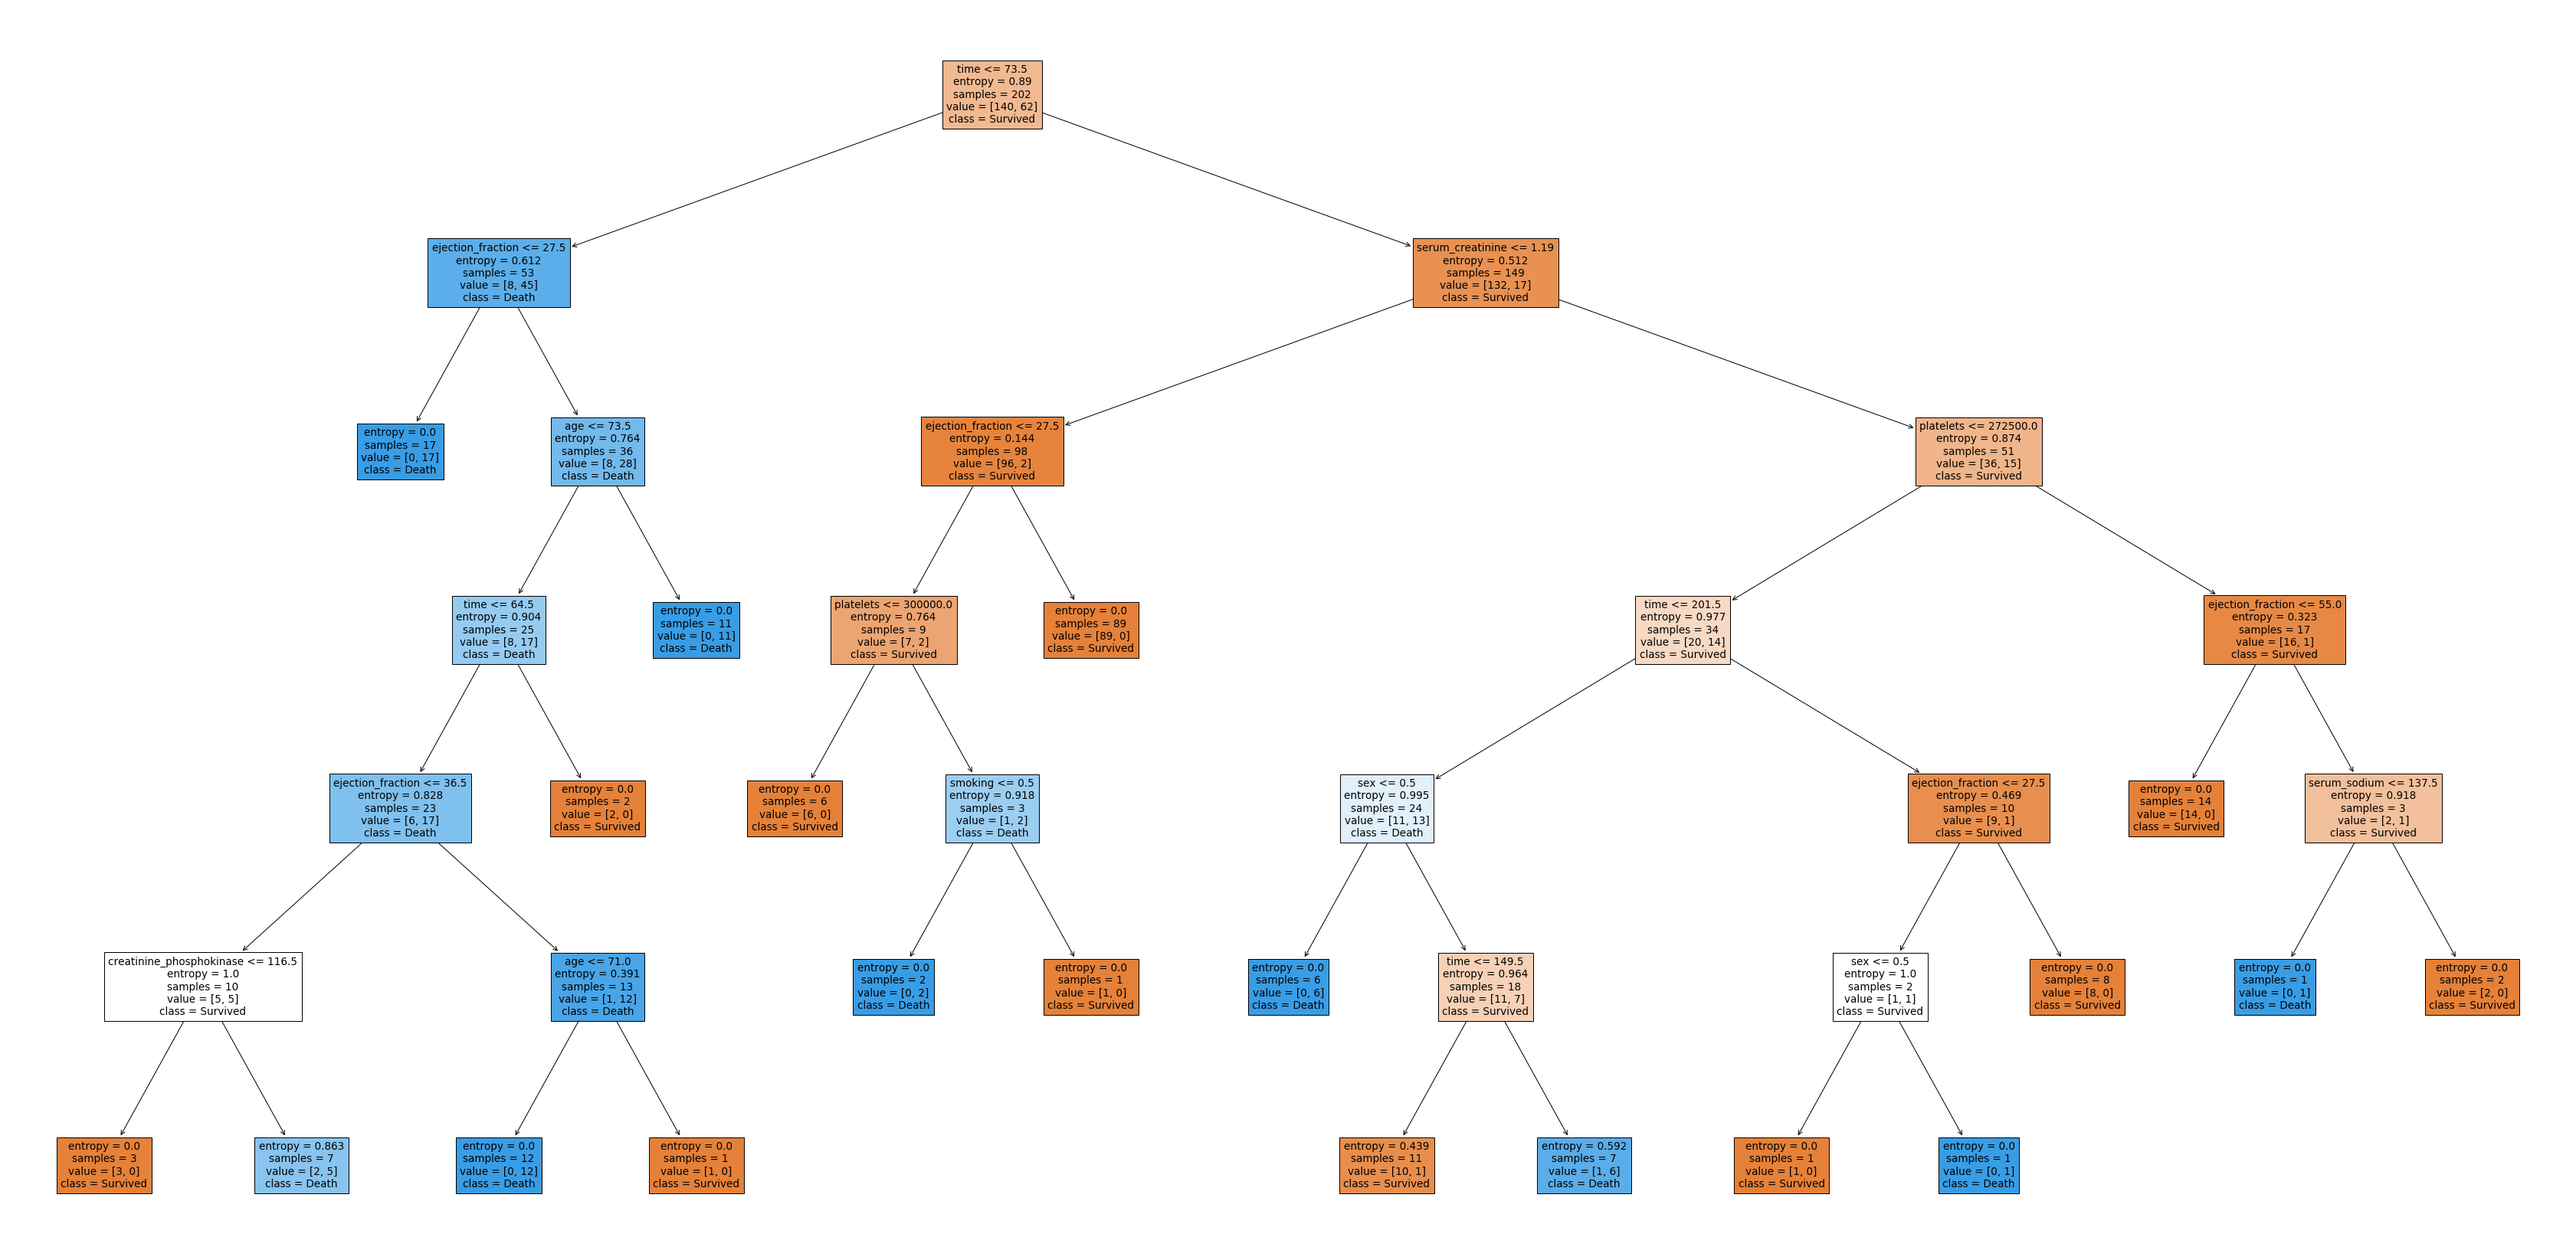

In [79]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
dt.fit(x_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['Survived', "Death"],filled=True);

y_test_pred = dt.predict(x_test)
cf = confusion_matrix(y_test, y_test_pred)
cf

array([[58,  5],
       [16, 18]], dtype=int64)

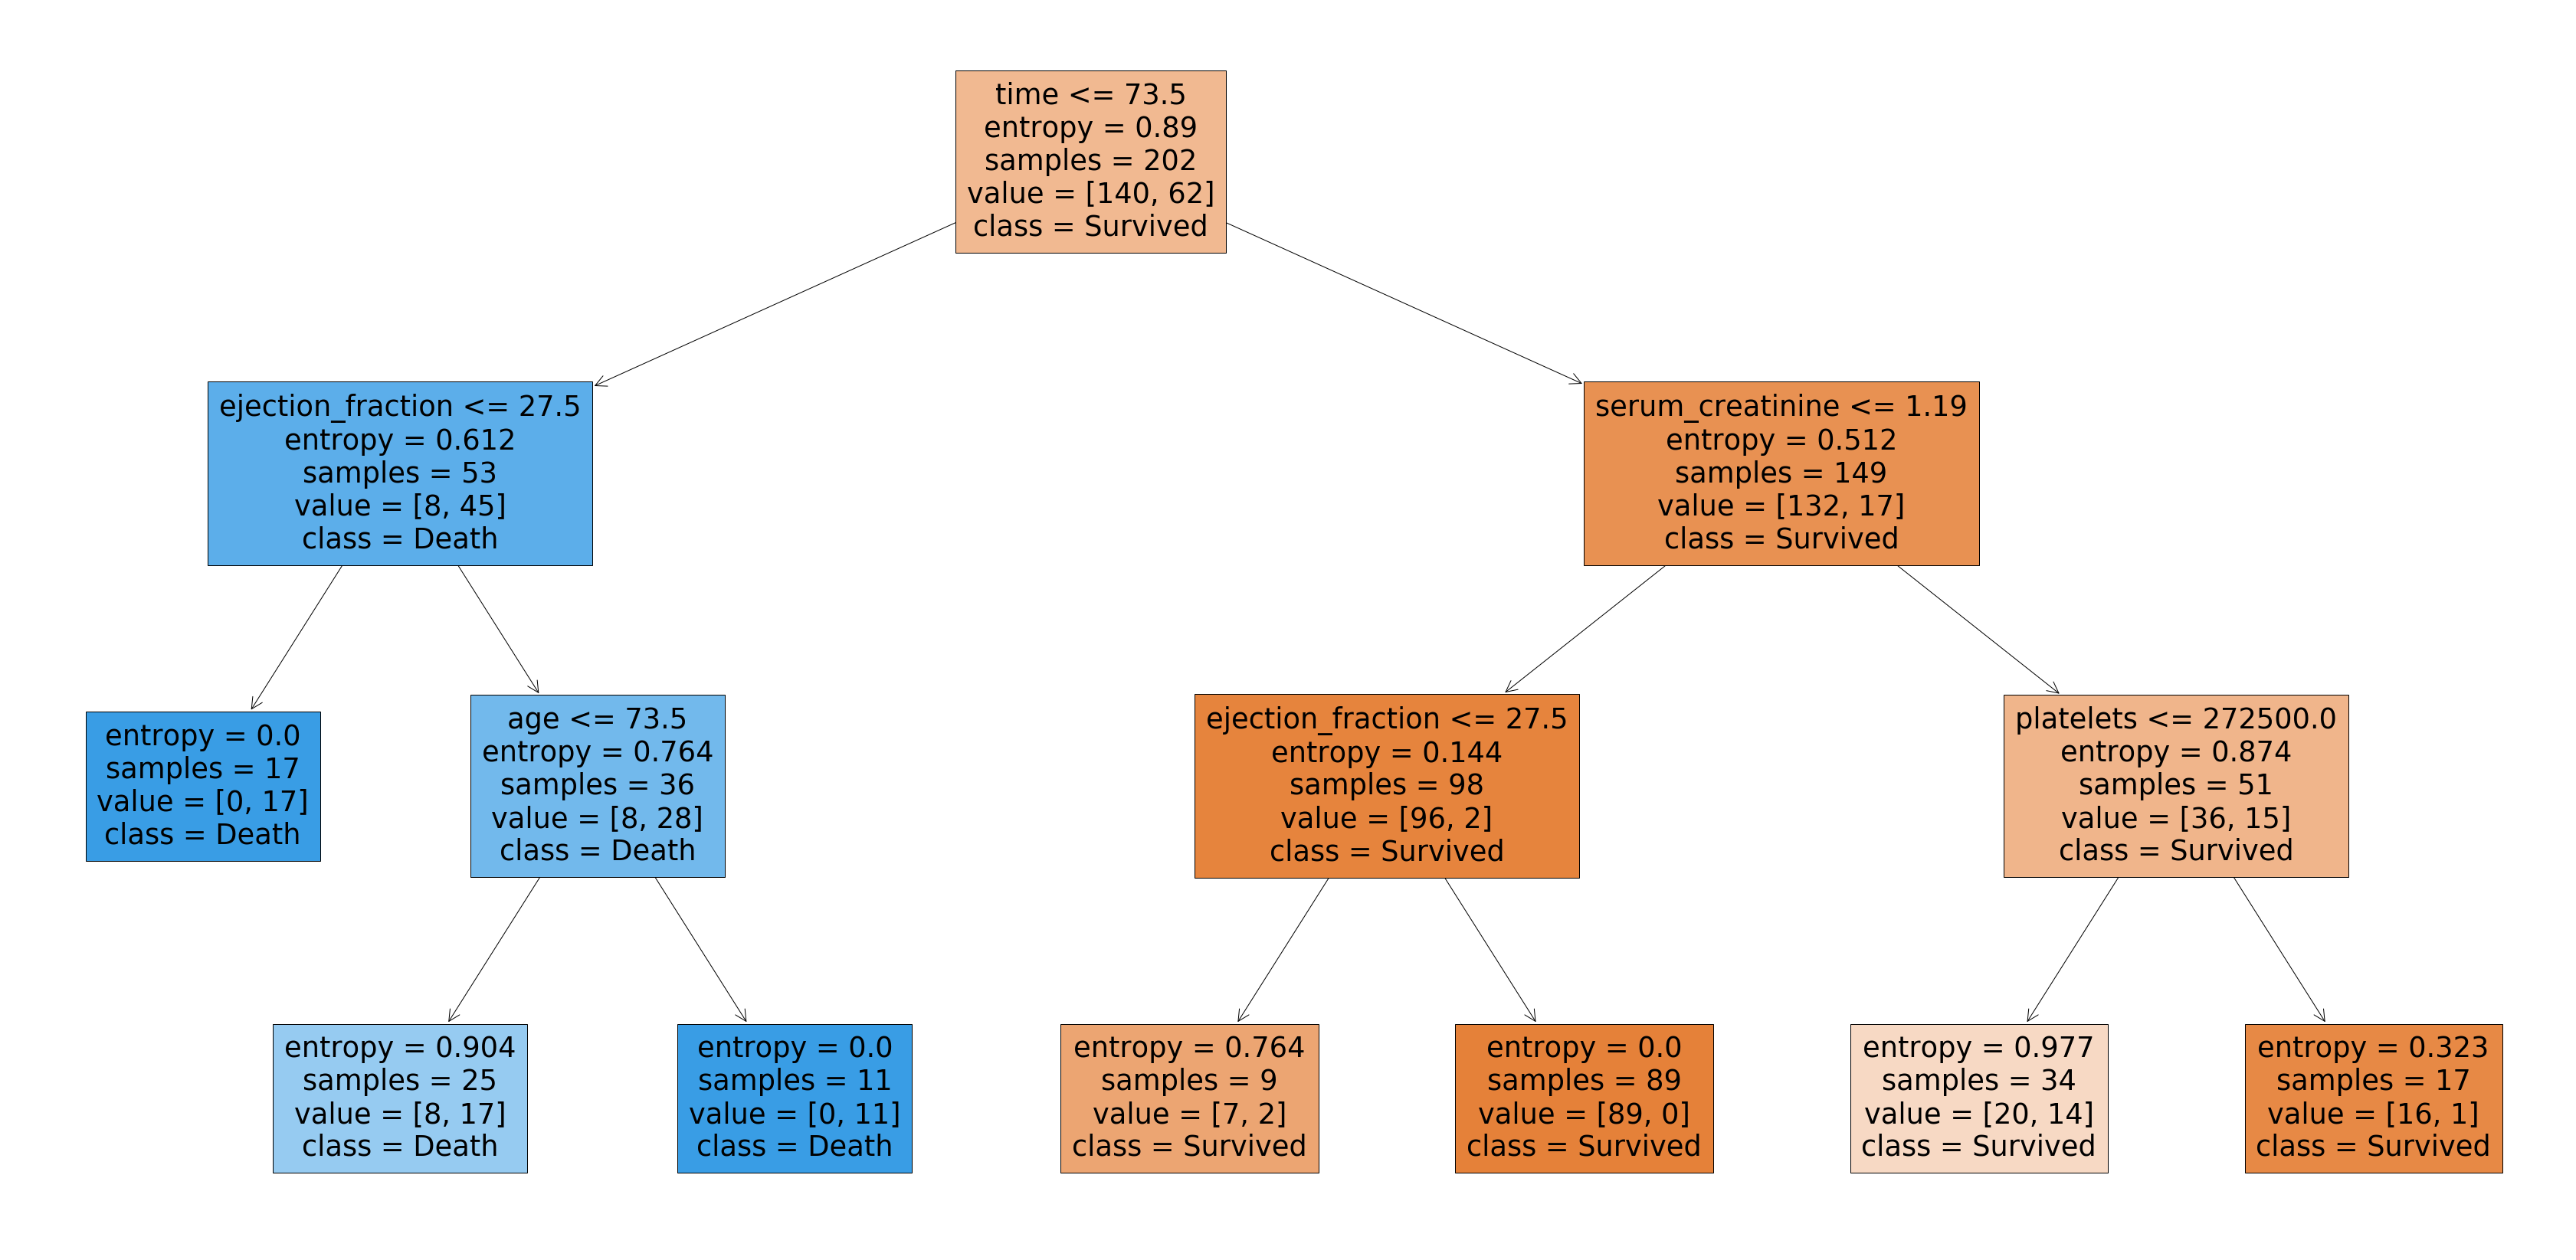

In [80]:
dt = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = 7)
dt.fit(x_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['Survived', "Death"],filled=True);

y_test_pred = dt.predict(x_test)
cf = confusion_matrix(y_test, y_test_pred)
cf